# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_20_agents_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.11999999731779099


When finished, you can close the environment.

```python
env.close()
```

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

The agent is trained using the Deep Deterministic Policy Gradient (DDPG) presented [here](https://arxiv.org/abs/1509.02971). The implementation below is based on the solution to the exercise at [this link](https://github.com/udacity/deep-reinforcement-learning/tree/master/ddpg-pendulum).

The DDPG algorithm consists of two neural networks (NN), the actor and the critic. The actor determines the best action to take, and the critic uses the action given by the actor to evaluate the optimum action value function.

- Initialization of the neural networks and weights and the q values (usually done by a random initialization).
- Initizialization of a replay memory to store experience tuples of the form (S, A, R, S').
- When sufficient tuples are store in memory, training of the deep learning models for the actor and the critic can starts. 
- Two target NN's are used to implement the fixed Q-targets technique. One target for the actor and one target for the critic. The target neural networks can be initialize with the same weights of the initial actor and critic neural networks.
- The actor and critic networks are not trained at each time step of an episode, instead, they are trained 10 times every 20 steps. On the other hand, the target networks are softly updated. This means that the weights of the actor and the critic are slowly blended into their respective target networks.
- Gradient clipping is used when training the critic network.
- Ornsetein-Uhlenbeck noise is added to the action space.

The implementation of the DDPG is on files `CC_ddpg_agent.py` and `CC_model.py`. The latest file contains the actor and critic networks architecture. In the present case, for the actor a simple network with 2 hidden layers and one output layer was chosen. The actor NN is as follows:

- First hidden layer: linear with 512 units and relu activation. The input size corresponds to 33, the dimension of the state space. 
- Second hidden layer: linear with 256 units and relu activation.
- Output layer: linear with 4 units corresponding to the 4 possible actions the agent can take. The hyperbolic tangent function is used as the activation.
- Learning rate: 0.0001.

The critic NN is as follows:

- First hidden layer: linear with 512 units and relu activation. The input size corresponds to 33, the dimension of the state space. 
- Second hidden layer: linear with 256 units and relu activation.
- Output layer: linear with 4 units corresponding to the 4 possible actions the agent can take. No activation function is applied.
- Learning rate: 0.0001.

The remaining parameters where:

- Gamma: 0.99.
- Soft update parameter Tau: 0.001. 

In order to visualize the agents behavior at each stage of learning, the weights are saved in `./checkpoints`. The weights for the solved agent are saved as `./checkpoints/solved_checkpoint.pth`.


In [5]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from CC_ddpg_agent import Agent
%matplotlib inline

agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=0)

In [7]:
def ddqn(n_episodes=2000, max_t=1000):
    """Deep Q-Learning.
    
In [ ]:

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scoreses = []                                         # list containing mean scores from each episode
    scores_window = deque(maxlen=100)                     # last 100 scores
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        states = env_info.vector_observations             # get the current states
        scores = np.zeros(num_agents)                     # initialize the score for each agent
        for t in range(max_t):
            actions = agent.act(states)                   # select an action for each agent
            env_info = env.step(actions)[brain_name]      # send the actions to the environment
            next_states = env_info.vector_observations    # get the next states
            rewards = env_info.rewards                    # get the rewards
            dones = env_info.local_done                   # see if episode has finished for an agent
            agent.step(states, actions, rewards, next_states, dones, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break
        scores_window.append(np.mean(scores))             # save most recent score
        scoreses.append(np.mean(scores))                  # save most recent score
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 20 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), './checkpoints/0'+str(i_episode)+'actor_checkpoint.pth')
            torch.save(agent.critic_local.state_dict(), './checkpoints/0'+str(i_episode)+'critic_checkpoint.pth')
        if np.mean(scores_window)>=30:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), './checkpoints/solved_actor_checkpoint.pth')
            torch.save(agent.critic_local.state_dict(), './checkpoints/solved_critic_checkpoint.pth')
            break
    return scoreses

scores = ddqn()

Episode 20	Average Score: 1.24
Episode 40	Average Score: 6.09
Episode 60	Average Score: 16.08
Episode 80	Average Score: 21.49
Episode 100	Average Score: 24.71
Episode 115	Average Score: 30.25
Environment solved in 115 episodes!	Average Score: 30.25


The environment starts to have consistent results (score >= 30) from episode: 41.


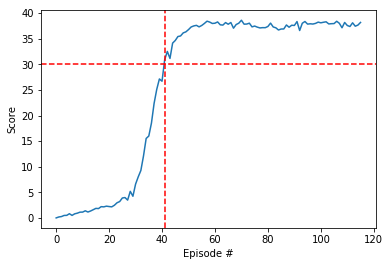

In [11]:
for i in range(len(scores)-1, -1,-1):
    if scores[i] <= 30:
        real_solved_episode = i + 2
        break
print("The environment starts to have consistent results (score >= 30) from episode: %d." %(real_solved_episode))
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.concatenate((np.arange(len(scores)),len(scores)), axis=None), np.concatenate((0,scores), axis=None))
plt.axhline(y=30, color='r', linestyle='--')
plt.axvline(x=real_solved_episode, color='r', linestyle='--')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

The environment is solved in 115 episodes, which is the episode where mean score in 100 episodes is higher than 30. However, the plot above shows that the environment can be considered as solved after episode 41 because after it, the mean score of the 20 agents never falls under 30.

In [8]:
import os
import re

dir_name = './checkpoints'                             # folder where checkpoints were saved
files = [f for f in os.listdir(dir_name)]              # list of checkpoints
files.sort()                                           # time steps to display

for i in range((len(files)-2)//2):
    # load the weights from file
    agent.actor_local.load_state_dict(torch.load(dir_name+'/'+files[i*2]))
    agent.critic_local.load_state_dict(torch.load(dir_name+'/'+files[i*2+1]))

    env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
    states = env_info.vector_observations               # get the current states
    scores = np.zeros(num_agents)                       # initialize the score for each agent
    while True:
        actions = agent.act(states, add_noise=False)    # select an action for each agent
        env_info = env.step(actions)[brain_name]        # send the actions to the environment
        next_states = env_info.vector_observations      # get the next states 
        rewards = env_info.rewards                      # get the rewards
        dones = env_info.local_done                     # see if episode has finished for an agent
        scores += rewards                               # update the scores
        states = next_states                            # roll over the states to next time step
        
        if np.any(dones):                                       
            break

    print("Average score after {} training episodes: {:.2f}".format(int(re.findall('[0-9]+', files[i*2])[0]), \
                                                                np.mean(scores)))

Average score after 20 training episodes: 2.57
Average score after 40 training episodes: 29.79
Average score after 60 training episodes: 39.53
Average score after 80 training episodes: 39.53
Average score after 100 training episodes: 39.54


In [12]:
agent.actor_local.load_state_dict(torch.load('./checkpoints/solved_actor_checkpoint.pth'))
agent.critic_local.load_state_dict(torch.load('./checkpoints/solved_critic_checkpoint.pth'))

env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
states = env_info.vector_observations               # get the current states
scores = np.zeros(num_agents)                       # initialize the score for each agent
while True:
    actions = agent.act(states, add_noise=False)    # select an action for each agent
    env_info = env.step(actions)[brain_name]        # send the actions to the environment
    next_states = env_info.vector_observations      # get the next states 
    rewards = env_info.rewards                      # get the rewards
    dones = env_info.local_done                     # see if episode has finished for an agent
    scores += rewards                               # update the scores
    states = next_states                            # roll over the states to next time step

    if np.any(dones):                                       
        break

print("Score: {:.2f}".format(np.mean(scores)))

Score: 39.57


In [13]:
env.close()

#### Possible improvements:

An option to improve the algortihm is to implement prioritized experience replay. In this technique, we admit that some experience tuples (S, A, R, S') are more important for learning than others. So the key here, is to identify the more meaningful tuples for learning contained in the replay memory. It just needs to be kept in mind that the agent needs to learn from all the experiences even if some are more important than others.

Other option would be to apply noise to the NN's parameters instead of applying Ornsetein-Uhlenbeck noise in the action space as shown [here](https://blog.openai.com/better-exploration-with-parameter-noise/).

Finally, an algorithm combining the two approaches just exposed can be implemented to further improve the agent.